In [24]:
%matplotlib inline

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from random import choice

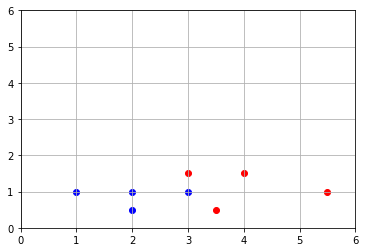

In [32]:
dataB1 = [2,1,0]
dataB2 = [3,1,0]
dataB3 = [2,.5,0]
dataB4 = [1,1,0]
dataR1 = [3,1.5,1]
dataR2 = [4,1.5,1]
dataR3 = [3.5,.5,1]
dataR4 = [5.5,1,1]

dataU = [4.5,1,"it should be 1"]
all_points = [dataB1,dataB2,dataB3,dataB4,dataR1,dataR2,dataR3,dataR4]

plt.axis([0,6,0,6])
plt.grid()
for i in range(len(all_points)):
    point = all_points[i]
    color = "r"
    if point[2]==0:
        color = "b"
    plt.scatter(point[0],point[1],c=color)

In [27]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [43]:
# training loop

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
print(w1)
print(w2)
print(b)

learning_rate = 0.2

for i in range(50000):
    point = choice(all_points)
    target = point[2]
    z = w1 * point[0] + w2 * point[1] + b
    prediction = sigmoid(z)
    cost = np.square(prediction - target)

    dcost_dpred = 2 * (prediction - target)
    dpred_dz = sigmoid(z)*(1 - sigmoid(z))
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
    dcost_db = dcost_dpred * dpred_dz * dz_db
    w1 = w1 - learning_rate*dcost_dw1
    w2 = w2 - learning_rate*dcost_dw2
    b = b - learning_rate*dcost_db
    

1.2906940877595883
-1.870363337733502
1.4280021367698854


In [29]:
# seeing the model prediction

for i in range(len(all_points)):
    point = all_points[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))
    

[2, 1, 0]
pred: 0.0006366996899595301
[3, 1, 0]
pred: 0.40905037233666647
[2, 0.5, 0]
pred: 0.00012435898056450384
[1, 1, 0]
pred: 5.864026167077333e-07
[3, 1.5, 1]
pred: 0.7800136250132064
[4, 1.5, 1]
pred: 0.9997404830158132
[3.5, 0.5, 1]
pred: 0.8166495669456424
[5.5, 1, 1]
pred: 0.9999999628690606


In [30]:
z = dataU[0] * w1 + dataU[1] * w2 + b
pred = sigmoid(z)
print(pred)

0.9999596602204704


In [40]:
from win32com.client import Dispatch
speak = Dispatch("SAPI.SpVoice")
def which_flower(len,width):
    z = len * w1 + width * w2 + b
    pred = sigmoid(z)
    print(pred)
    if(pred>0.5):
        speak.Speak("Red")
    else:
        speak.Speak("Blue")


In [41]:
which_flower(4.5,1)

0.9999596602204704


In [42]:
which_flower(np.inf,np.inf)

1.0


In [50]:
# scatter points

def which(length,width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    print(pred)
    color = "b"
    if(pred>.5):
        color = "r"
    plt.axis([0,6,0,6])
    plt.grid()
    plt.scatter(length,width,c=color)

0.9991367002009557


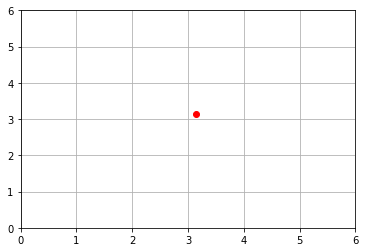

In [54]:
which(np.pi,np.pi)